In [119]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('max_colwidth', 400)

In [120]:
# read data into dataframe

wp_mentalhealth_df = pd.read_csv('resources/Original Data/survey.csv')

wp_mentalhealth_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [121]:
#brief summary of the dataframe

wp_mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [122]:
# dataframe columns

wp_mentalhealth_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [123]:
#drop unneeded columns

new_wp_mentalhealth_df = wp_mentalhealth_df.drop(['state', 'self_employed','coworkers','comments','tech_company',
                         'remote_work','supervisor','work_interfere','leave','obs_consequence'],axis=1)



In [124]:

#renaming new csv columns 

new_wp_mentalhealth_df.rename(columns = {'family_history':'Family History', 'treatment':'Treatment', 'no_employees': '# of Employees',
                           'benefits':'Benefits','care_options':'Care Options','wellness_program':'Wellness Programs',
                           'seek_help':'Help Resources','anonymity':'Anonymity', 'mental_health_consequence':'Mental Health Consequence',
                           'phys_health_consequence':'Physical Health Consequence','mental_health_interview':'Mental Health Interview',
                           'phys_health_interview':'Physical Health Interview','mental_vs_physical':'Mental v. Physical'}, inplace = True)



In [125]:
#checking unique gender values

new_wp_mentalhealth_df['Gender'].unique()



array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [126]:
#cleaning gender column 

accepted_genders = ['Male', 'Female','Other']

new_gender_column = new_wp_mentalhealth_df[new_wp_mentalhealth_df['Gender'].str.contains('Male|Female|Other') == False]

new_gender_column.head(10)



,Timestamp,Age,Gender,Country,Family History,Treatment,# of Employees,Benefits,Care Options,Wellness Programs,Help Resources,Anonymity,Mental Health Consequence,Physical Health Consequence,Mental Health Interview,Physical Health Interview,Mental v. Physical
1,2014-08-27 11:29:37,44,M,United States,No,No,More than 1000,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know
7,2014-08-27 11:32:05,39,M,Canada,No,No,1-5,No,Yes,No,No,Yes,No,No,No,No,No
11,2014-08-27 11:32:49,29,male,Bulgaria,No,No,100-500,Don't know,Not sure,No,No,Don't know,No,No,Yes,Yes,Don't know
12,2014-08-27 11:33:23,42,female,United States,Yes,Yes,26-100,Yes,Yes,No,No,Don't know,Yes,Yes,Maybe,Maybe,No
15,2014-08-27 11:34:00,29,female,United States,Yes,Yes,26-100,Yes,Not sure,No,No,Don't know,No,No,Maybe,Maybe,Don't know
18,2014-08-27 11:34:53,46,male,United States,Yes,No,1-5,Yes,Not sure,Yes,Don't know,Yes,No,No,No,Yes,Yes
21,2014-08-27 11:35:24,31,male,United States,No,No,1-5,No,No,No,No,Yes,No,No,No,Maybe,Yes
24,2014-08-27 11:36:48,33,male,United States,Yes,Yes,26-100,Yes,Not sure,Don't know,Yes,Yes,No,No,No,Yes,Don't know
25,2014-08-27 11:37:08,35,male,United States,Yes,Yes,More than 1000,Yes,Yes,No,Don't know,No,Yes,No,No,Yes,No
26,2014-08-27 11:37:23,33,male,United States,No,No,1-5,Don't know,Not sure,No,Don't know,Don't know,Maybe,Maybe,No,No,Don't know


In [127]:
#checking unique age values 

new_wp_mentalhealth_df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [128]:
#cleaning age column

new_wp_mentalhealth_df = new_wp_mentalhealth_df[wp_mentalhealth_df.Age > 18]
new_wp_mentalhealth_df = new_wp_mentalhealth_df[new_wp_mentalhealth_df.Age < 100]

new_wp_mentalhealth_df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48, 20,
       57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [129]:
#saving into new csv

new_wp_mentalhealth_df.to_csv('resources/workplace mental health.csv')

new_wp_mentalhealth_df.head(12)

,Timestamp,Age,Gender,Country,Family History,Treatment,# of Employees,Benefits,Care Options,Wellness Programs,Help Resources,Anonymity,Mental Health Consequence,Physical Health Consequence,Mental Health Interview,Physical Health Interview,Mental v. Physical
0,2014-08-27 11:29:31,37,Female,United States,No,Yes,6-25,Yes,Not sure,No,Yes,Yes,No,No,No,Maybe,Yes
1,2014-08-27 11:29:37,44,M,United States,No,No,More than 1000,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know
2,2014-08-27 11:29:44,32,Male,Canada,No,No,6-25,No,No,No,No,Don't know,No,No,Yes,Yes,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Yes,26-100,No,Yes,No,No,No,Yes,Yes,Maybe,Maybe,No
4,2014-08-27 11:30:22,31,Male,United States,No,No,100-500,Yes,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Don't know
5,2014-08-27 11:31:22,33,Male,United States,Yes,No,6-25,Yes,Not sure,No,Don't know,Don't know,No,No,No,Maybe,Don't know
6,2014-08-27 11:31:50,35,Female,United States,Yes,Yes,1-5,No,No,No,No,No,Maybe,Maybe,No,No,Don't know
7,2014-08-27 11:32:05,39,M,Canada,No,No,1-5,No,Yes,No,No,Yes,No,No,No,No,No
8,2014-08-27 11:32:39,42,Female,United States,Yes,Yes,100-500,Yes,Yes,No,No,No,Maybe,No,No,Maybe,No
9,2014-08-27 11:32:43,23,Male,Canada,No,No,26-100,Don't know,No,Don't know,Don't know,Don't know,No,No,Maybe,Maybe,Yes


In [130]:
#creating new csv for stephanie's research question

mental_health_assistance_df = new_wp_mentalhealth_df[['Benefits','Treatment','Anonymity']]

mental_health_assistance_df.to_csv('resources/workplace assistance.csv')

mental_health_assistance_df.head()


,Benefits,Treatment,Anonymity
0,Yes,Yes,Yes
1,Don't know,No,Don't know
2,No,No,Don't know
3,No,Yes,No
4,Yes,No,Don't know


In [131]:
# stephanie's question 1: if the workplace offers mental health assistance are employees more likely to seek treatment?

#created a new dataframe where all benefits are yes 

yes_df = mental_health_assistance_df.loc[mental_health_assistance_df['Benefits'] == 'Yes']
yes_df.head()

,Benefits,Treatment,Anonymity
0,Yes,Yes,Yes
4,Yes,No,Don't know
5,Yes,No,Don't know
8,Yes,Yes,No
12,Yes,Yes,Don't know


In [132]:
#filtering through the benefits column where treatment was also yes

yes_df = mental_health_assistance_df.loc[mental_health_assistance_df['Benefits'] == 'Yes']

yes_df['Treatment'].loc[yes_df['Treatment'].str.contains('Yes').value_counts()]


302     No
170    Yes
Name: Treatment, dtype: object

In [133]:
#find the average of how many people that got treatment and had benefits
amount_yes = len(yes_df.loc[yes_df['Treatment'] == 'Yes'])

average_yes = amount_yes/len(yes_df)
average_yes

0.6398305084745762

In [134]:
#created a new dataframe where workers had no benefits 

No_df = mental_health_assistance_df.loc[mental_health_assistance_df['Benefits'] == 'No']
No_df.head()

,Benefits,Treatment,Anonymity
2,No,No,Don't know
3,No,Yes,No
6,No,Yes,No
7,No,No,Yes
19,No,No,Yes


In [135]:
#benefits is no but treatment is yes
amount_no = len(No_df.loc[No_df['Treatment'] == 'Yes'])
amount_no

178

In [136]:
#finding the average of how many people got treatment even if benefits weren't offered 
average_no = amount_no/len(No_df)
average_no

0.4823848238482385

In [137]:
#finding how many had no benefits and got no treatment
amount_2no = len(No_df.loc[No_df['Treatment'] == 'No'])
amount_2no

191

In [138]:
#how many got treatment whether benefits was offered or not
amount_all = len(mental_health_assistance_df.loc[mental_health_assistance_df['Treatment'] == 'Yes'])
amount_all

629

In [139]:
#finding the average of how many people on average get treatment
average_all = amount_all/len(mental_health_assistance_df)
average_all

#Results: about 50% of people get treatment

0.5056270096463023

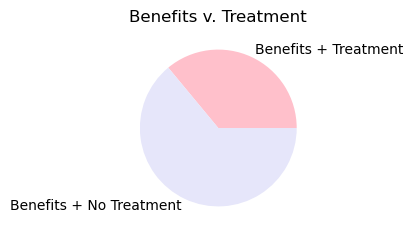

In [140]:
#create pie chart

q1_piechart= np.array([170, 302])
mylabels = ["Benefits + Treatment", "Benefits + No Treatment"]
mcolors = ["pink","lavender"]


plt.pie(q1_piechart, labels = mylabels, colors = mcolors )
plt.title("Benefits v. Treatment")

plt.savefig('resources/benefits_treatment.png')
plt.show()

#In conclusion, if mental health assistance benefits is offered at work they are not more likely to get treatment. 


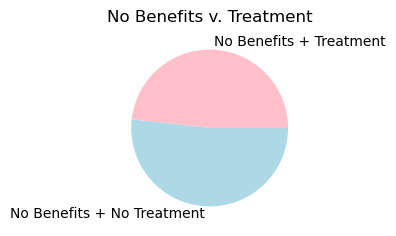

In [141]:
#create second pie chart

q11_piechart= np.array([178, 191])
mylabels = ["No Benefits + Treatment", "No Benefits + No Treatment"]
mcolors = ["pink","lightblue"]


plt.pie(q11_piechart, labels = mylabels, colors = mcolors )
plt.title("No Benefits v. Treatment")

plt.savefig('resources/nobenefits_treatment.png')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

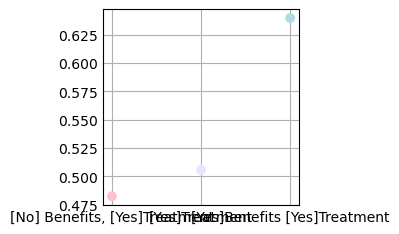

<Figure size 10000x10000 with 0 Axes>

In [154]:
#create scatter plot
y = [average_no,average_all,average_yes]
x = ['[No] Benefits, [Yes]Treatment','[Yes]Treatment','[Yes]Benefits [Yes]Treatment']
colors = ['pink','lavender','lightblue']

plt.scatter(x,y,c = colors)
plt.figure(figsize=(5,100))
plt.savefig('resources/scatter_benefits_treatment.png')
plt.show

In [143]:
#stephanie's question 2: if the worker is anonymously protected are they more likely to seek out help from their workplace mental health assistance programs? 

#creating a list to filter through using numpy

cols = ['Benefits', 'Treatment', 'Anonymity']
yes_df['new'] = yes_df[cols].to_numpy().tolist()

#empty list
all_yes_arr = []

#filtering through 
for row in yes_df['new']:
    yes_count = 0
    for value in row:
        if 'Yes' in value:
            yes_count = yes_count + 1
        if 'Yes' in value and yes_count > 2:
            all_yes_arr.append(row)


len(all_yes_arr)

/var/folders/hz/vsj18twd7b72dvy4b8gghhc80000gn/T/ipykernel_26811/2126782384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_df['new'] = yes_df[cols].to_numpy().tolist()


149

In [144]:
#create empty list, 

anon_no_arr = []

#create a loop to check how many got treatment at work when no anonymity was offered
for row in yes_df['new']:
    yes_count = 0
    for value in row:
        if 'Yes' in value:
            yes_count = yes_count + 1
        if 'No' in value and yes_count == 2:
            anon_no_arr.append(row)

len(anon_no_arr)

6

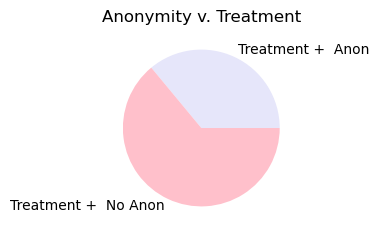

In [145]:
#create pie chart

q2_piechart= np.array([149, 6])
mylabels = [ "Treatment +  Anon ", "Treatment +  No Anon"]
mcolors = ["lavender","pink"]


plt.pie(q1_piechart, labels = mylabels, colors = mcolors )
plt.title("Anonymity v. Treatment")

plt.savefig('resources/anonymity_treatment.png')
plt.show()

In [146]:
#creating new csv for mai's research question


In [147]:
#question


In [148]:
#creating new csv for okechukwu research question

In [149]:
#question